In [37]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import *
from core.utils_data import df_info

In [2]:
df = pd.read_csv(ENV_CSV, index_col=0, parse_dates=True)
df.index.name = "Date"
# df.rename(columns={old : new for old, new in zip(df, ASSETS)}, inplace=True)

In [3]:
assets = df.iloc[:,:8]

In [33]:
assets.shape

(3471, 8)

In [39]:
# linear return (correct way to estimate optimal portfolio)
lt = assets.pct_change(1)     # 1 day
lt5 = assets.pct_change(5)    # 5 day
lt10 = assets.pct_change(10)  # 10 day
lt.columns = [a + "_lt" for a in ASSETS]
lt5.columns = [a + "_lt5" for a in ASSETS]
lt10.columns = [a + "_lt10" for a in ASSETS]

# compounded return
ct = np.log(lt + 1)      # 1 day
ct5 = np.log(lt5 + 1)    # 5 day
ct10 = np.log(lt10 + 1)  # 10 day
ct.columns = [a + "_ct" for a in ASSETS]
ct5.columns = [a + "_ct5" for a in ASSETS]
ct10.columns = [a + "_ct10" for a in ASSETS]

# 1 day trend
up = lt.where(lt > 0, False)
up.where(up <= 0, True, inplace=True)
up.columns = [a + "_up1" for a in ASSETS]

# 5 day trend
up5 = ct5.where(ct5 > 0, False)
up5.where(up5 <= 0, True, inplace=True)
up5.columns = [a + "_up5" for a in ASSETS]

# 10 day trend
up10 = ct10.where(ct10 > 0, False)
up10.where(up10 <= 0, True, inplace=True)
up10.columns = [a + "_up10" for a in ASSETS]


lts = pd.concat([lt, lt5, lt10], axis=1)
cts = pd.concat([ct, ct5, ct10], axis=1)
ups = pd.concat([up, up5, up10], axis=1)
changes = pd.concat([lts, cts, ups], axis=1)

In [40]:
df_info(changes)

,dtype,missing,mean,std,min,25%,50%,75%,max,unique,top,freq
IWD_lt,float64,1,0.000351951,0.0123074,-0.0917055,-0.00399813,0.00064073,0.0055843,0.128307,NaN,NaN,NaN
IWF_lt,float64,1,0.000434112,0.0112553,-0.0863038,-0.0040291,0.000878367,0.00559921,0.123094,NaN,NaN,NaN
IWO_lt,float64,1,0.00046009,0.0147936,-0.102254,-0.00659365,0.00101671,0.00818329,0.10944,NaN,NaN,NaN
IWN_lt,float64,1,0.000396208,0.0150726,-0.126405,-0.00641058,0.000758691,0.00765009,0.0948543,NaN,NaN,NaN
EFA_lt,float64,1,0.000269474,0.0140785,-0.111632,-0.00530421,0.000613954,0.00660699,0.158876,NaN,NaN,NaN
TIP_lt,float64,1,0.000140373,0.00384421,-0.029531,-0.00190176,0.00011811,0.00225337,0.0369654,NaN,NaN,NaN
GLD_lt,float64,1,0.00036308,0.0117524,-0.0878083,-0.00530882,0.00052617,0.0064254,0.112905,NaN,NaN,NaN
VNQ_lt,float64,1,0.000483807,0.0197614,-0.195137,-0.00655679,0.000703484,0.00761485,0.170065,NaN,NaN,NaN
IWD_lt5,float64,5,0.00169646,0.0247571,-0.21114,-0.00856767,0.00329202,0.0138712,0.205947,NaN,NaN,NaN
IWF_lt5,float64,5,0.0021411,0.0230852,-0.170546,-0.00827064,0.00396667,0.0146274,0.169118,NaN,NaN,NaN


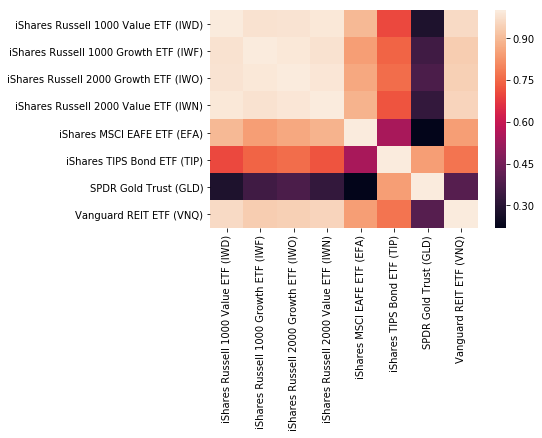

In [38]:
sns.heatmap(assets.corr())

In [39]:
pct1 = assets.pct_change(1)
pct10 = assets.pct_change(10)
compounded = np.log(assets.pct_change(1) + 1)
cumsp = pct1.cumsum()
cumsl = compounded.cumsum()

In [40]:
cumsp.head(5)

,iShares Russell 1000 Value ETF (IWD),iShares Russell 1000 Growth ETF (IWF),iShares Russell 2000 Growth ETF (IWO),iShares Russell 2000 Value ETF (IWN),iShares MSCI EAFE ETF (EFA),iShares TIPS Bond ETF (TIP),SPDR Gold Trust (GLD),Vanguard REIT ETF (VNQ)
Date,,,,,,,,
2005-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-10,0.004013,0.006250,0.009982,0.010000,0.004509,0.000668,0.002629,-0.003177
2005-01-11,-0.002289,-0.000582,-0.001313,0.000915,0.002585,0.001621,0.008827,-0.013301
2005-01-12,0.000031,0.003796,0.000115,0.002836,0.010616,0.005145,0.018066,-0.018036
2005-01-13,-0.004753,-0.006997,-0.000995,-0.002095,0.002012,0.007707,0.018066,-0.018036


In [34]:
pct1.head(5)

,iShares Russell 1000 Value ETF (IWD),iShares Russell 1000 Growth ETF (IWF),iShares Russell 2000 Growth ETF (IWO),iShares Russell 2000 Value ETF (IWN),iShares MSCI EAFE ETF (EFA),iShares TIPS Bond ETF (TIP),SPDR Gold Trust (GLD),Vanguard REIT ETF (VNQ)
2005-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-10,0.004013,0.006250,0.009982,0.010000,0.004509,0.000668,0.002629,-0.003177
2005-01-11,-0.006302,-0.006832,-0.011296,-0.009085,-0.001923,0.000953,0.006198,-0.010124
2005-01-12,0.002320,0.004378,0.001428,0.001921,0.008031,0.003523,0.009240,-0.004734
2005-01-13,-0.004784,-0.010793,-0.001109,-0.004931,-0.008604,0.002562,0.000000,0.000000


In [35]:
cumsl.head(5)

,iShares Russell 1000 Value ETF (IWD),iShares Russell 1000 Growth ETF (IWF),iShares Russell 2000 Growth ETF (IWO),iShares Russell 2000 Value ETF (IWN),iShares MSCI EAFE ETF (EFA),iShares TIPS Bond ETF (TIP),SPDR Gold Trust (GLD),Vanguard REIT ETF (VNQ)
2005-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-10,4.004560e-03,0.006231,9.932728e-03,0.009950,0.004499,0.000668,0.002626,-0.003182
2005-01-11,-2.317325e-03,-0.000625,-1.427117e-03,0.000824,0.002573,0.001621,0.008804,-0.013358
2005-01-12,5.854692e-17,0.003744,5.507747e-17,0.002743,0.010572,0.005138,0.018001,-0.018103
2005-01-13,-4.795344e-03,-0.007108,-1.109945e-03,-0.002200,0.001931,0.007697,0.018001,-0.018103


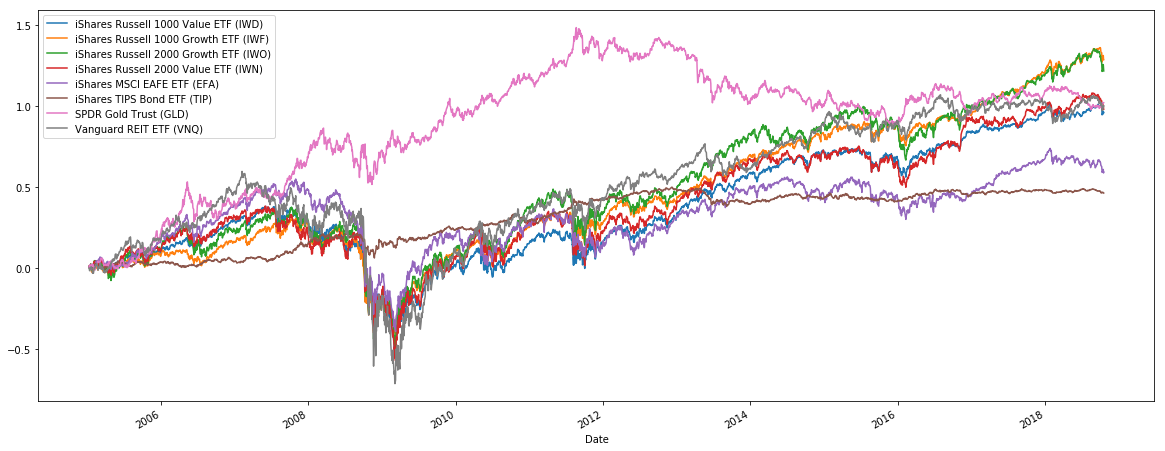

In [41]:
cumsl.plot(figsize=(20,8))

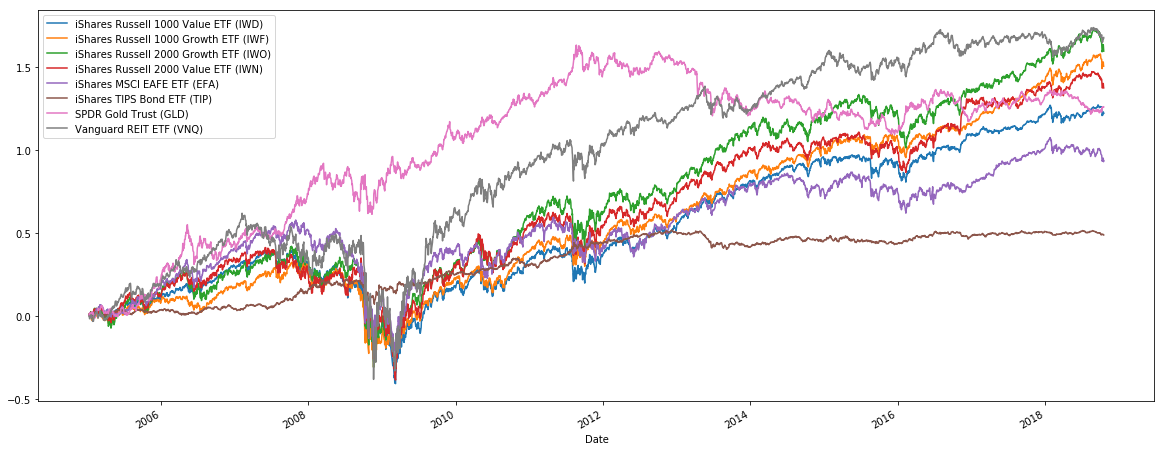

In [42]:
cumsp.plot(figsize=(20,8))

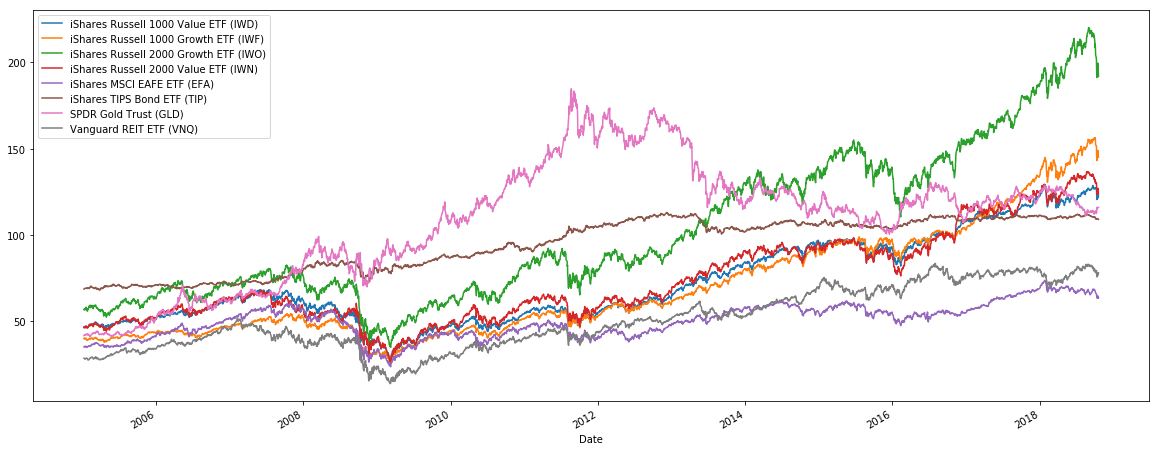

In [43]:
assets.plot(figsize=(20, 8))

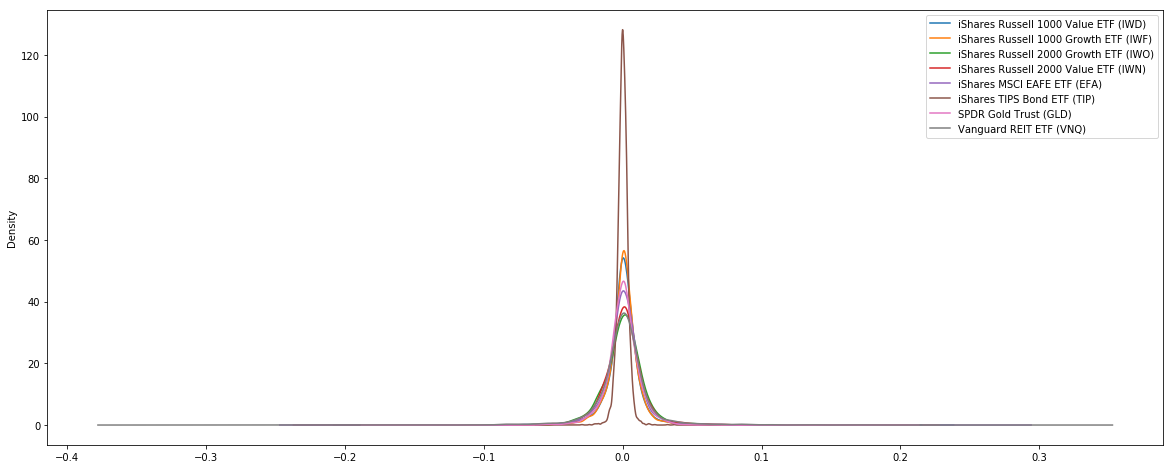

In [44]:
pct1.plot(kind="kde", figsize=(20, 8))

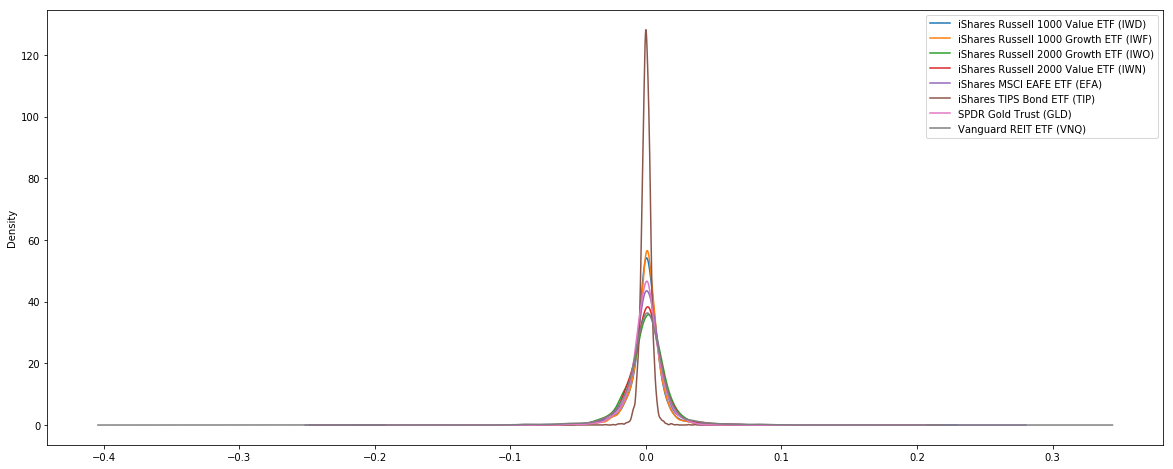

In [45]:
compounded.plot(kind="kde", figsize=(20, 8))

In [1]:
import json
import os
from config import *

In [2]:
show_config()

{'agent': {'net_config': {'cells': [32, 32, 32]},
           'train': {'batch_size': 20,
                     'episodes': 100,
                     'epochs': 200,
                     'learning_rate': 0.0001}},
 'data': {'assets': {'EFA': 'iShares MSCI EAFE ETF (EFA)',
                     'GLD': 'SPDR Gold Trust (GLD)',
                     'IWD': 'iShares Russell 1000 Value ETF (IWD)',
                     'IWF': 'iShares Russell 1000 Growth ETF (IWF)',
                     'IWN': 'iShares Russell 2000 Value ETF (IWN)',
                     'IWO': 'iShares Russell 2000 Growth ETF (IWO)',
                     'TIP': 'iShares TIPS Bond ETF (TIP)',
                     'VNQ': 'Vanguard REIT ETF (VNQ)'},
          'date': {'end': '2018-10-20', 'start': '2005-01-01'},
          'fred_data': {'A191RL1Q225SBEA': 'Real Gross Domestic Product',
                        'CPIAUCSL': 'Consumer Price Index for All Urban '
                                    'Consumers: All Items',
                

In [29]:
config["environment"]["risk_aversion"] = 2.

In [1]:
from config import *

In [2]:
show_config()

{'agent': {'net_config': {'cells': [32, 32, 32]},
           'train': {'batch_size': 20,
                     'episodes': 100,
                     'epochs': 200,
                     'learning_rate': 0.0001}},
 'data': {'assets': {'EFA': 'iShares MSCI EAFE ETF (EFA)',
                     'GLD': 'SPDR Gold Trust (GLD)',
                     'IWD': 'iShares Russell 1000 Value ETF (IWD)',
                     'IWF': 'iShares Russell 1000 Growth ETF (IWF)',
                     'IWN': 'iShares Russell 2000 Value ETF (IWN)',
                     'IWO': 'iShares Russell 2000 Growth ETF (IWO)',
                     'TIP': 'iShares TIPS Bond ETF (TIP)',
                     'VNQ': 'Vanguard REIT ETF (VNQ)'},
          'date': {'end': '2018-10-20', 'start': '2005-01-01'},
          'fred_data': {'A191RL1Q225SBEA': 'Real Gross Domestic Product',
                        'CPIAUCSL': 'Consumer Price Index for All Urban '
                                    'Consumers: All Items',
                

In [2]:
overwrite_env_config("risk_aversion", 2.)

In [4]:
overwrite_env_config("risk_aversion", 2.)